En este archivo haremos un análisis exploratorio preliminar de los viajes de los "High Volume For-Hire Vehicle (HVFHV)" para el __segundo semestre__ del año __2020__. Esta categoría empezó a aplicarse en Febrero de 2019 en NYC a vehículos con más de 10000 viajes por día.

In [1]:
import modin.pandas as pd
from distributed import Client
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Inicializa un cliente Dask para la ejecución distribuida en múltiples núcleos
client = Client(memory_limit='8GB')

In [2]:
tlc_20_07 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-07.parquet")
tlc_20_08 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-08.parquet")
tlc_20_09 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-09.parquet")
tlc_20_10 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-10.parquet")
tlc_20_11 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-11.parquet")
tlc_20_12 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-12.parquet")

In [3]:
# Todos los dataframes del segundo semestre de 2020.
tlc_20_S2 = [tlc_20_07, tlc_20_08, tlc_20_09, tlc_20_10, tlc_20_11, tlc_20_12]

## Estructura general

In [4]:
tlc_20_07.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

Hay 24 columnas:
* 4 de tipo datetime.
* 9 de tipo float.
* 3 de tipo int.
* 8 de tipo object.

In [5]:
for df in tlc_20_S2:
    print(f"Filas: {df.shape[0]}")

Filas: 9958454
Filas: 11096852
Filas: 12106669
Filas: 13268411
Filas: 11596865
Filas: 11637123


In [6]:
tlc_20_07.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02764,B02764,2020-06-30 23:56:13,2020-06-30 23:58:08,2020-07-01 00:00:21,2020-07-01 00:12:27,143,107,3.37,726,1.27,2.75,NaN,0.0,12.28,N,N,,N,N
1,HV0003,B02764,B02764,2020-07-01 00:18:14,2020-07-01 00:20:03,2020-07-01 00:22:39,2020-07-01 00:32:09,170,87,5.20,570,2.19,2.75,NaN,0.0,16.75,N,N,,N,N
2,HV0003,B02764,B02764,2020-07-01 00:31:14,2020-07-01 00:32:09,2020-07-01 00:33:39,2020-07-01 01:12:35,87,87,13.43,2336,4.88,2.75,NaN,0.0,38.76,N,N,,N,N
3,HV0003,B02764,B02764,2020-07-01 00:00:00,2020-07-01 00:03:25,2020-07-01 00:04:53,2020-07-01 00:30:28,36,209,6.12,1535,3.71,2.75,NaN,0.0,26.31,N,N,,N,N
4,HV0003,B02764,B02764,2020-07-01 00:28:55,2020-07-01 00:34:37,2020-07-01 00:38:05,2020-07-01 01:14:46,261,265,16.94,2201,0.00,0.00,NaN,0.0,52.93,N,N,,N,N


## Duplicados

Vamos a analizar la presencia de duplicados. Al haber tantas columnas, vamos a elegir un subset representativo. En caso de encontrar duplicados aplicaremos distintas estrategias.

In [7]:
#tlc_20_07.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

449

Vemos 449 duplicados en este subset. Veamos si se mantienen en todas las columnas.

In [4]:
#tlc_20_07.duplicated().sum()

449

Efectivamente hay 449 duplicados en julio de 2020.

In [4]:
#tlc_20_08.duplicated(subset=["pickup_datetime", "dropoff_datetime", 
#                             "PULocationID", "DOLocationID", "trip_miles"]).sum()

814

Vemos 814 duplicados en este subset. Veamos si se mantienen en todas las columnas.

In [4]:
#tlc_20_08.duplicated().sum()

814

Efectivamente hay 814 duplicados en agosto de 2020.

In [4]:
#tlc_20_09.duplicated().sum()

1258

In [4]:
#tlc_20_10.duplicated().sum()

1441

In [4]:
#tlc_20_11.duplicated().sum()

0

In [4]:
#tlc_20_12.duplicated().sum()

0

## hvfhs_license_num

In [4]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.hvfhs_license_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [5]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.hvfhs_license_num.unique()}")

Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0004' 'HV0005']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']


In [6]:
for df in tlc_20_S2:
    print(df.hvfhs_license_num.value_counts(normalize=True), "\n")

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


hvfhs_license_num
HV0003    0.711107
HV0005    0.272743
HV0004    0.016150
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.707993
HV0005    0.276896
HV0004    0.015110
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.730817
HV0005    0.257454
HV0004    0.011730
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.738429
HV0005    0.250451
HV0004    0.011121
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.722202
HV0005    0.266510
HV0004    0.011287
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.729254
HV0005    0.259808
HV0004    0.010939
Name: proportion, dtype: float64 



Hay 3 compañias HV0003 (Uber) con aprox. 72% de los viajes, HV0005 (Lyft) con aprox. 26% y HV0004 (Via) con menos del 1% de los viajes.

## dispatching_base_num

In [7]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.dispatching_base_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [8]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{sorted(df.dispatching_base_num.unique())}")

Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B0

Cada base está asociada con una compañía distinta.

## originating_base_num

In [9]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.originating_base_num.isna().mean()}")

Promedio de nulos por mes: 0.28886642444700755
Promedio de nulos por mes: 0.2922701861753225
Promedio de nulos por mes: 0.26973777840956914
Promedio de nulos por mes: 0.2624281837516188
Promedio de nulos por mes: 0.2784824174464392
Promedio de nulos por mes: 0.27105187424761257


Hay un promedio de 26-29% de valores faltantes en esta columna.

In [10]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.originating_base_num.unique()}")

Los valores únicos por mes: ['B02764' 'B02864' 'B02872' 'B02887' 'B02888' 'B02682' None 'B02876'
 'B02617' 'B02883' 'B02875' 'B02889' 'B02867' 'B02836' 'B02871' 'B02882'
 'B02869' 'B02877' 'B02865' 'B02765' 'B02866' 'B02879' 'B02835' 'B02880'
 'B02884' 'B02395' 'B02870' 'B02878' 'B02512' 'B02510' 'B03136' 'B02800'
 'B02729' 'B00457' 'B02826' 'B00446' 'B00887' 'B03153']
Los valores únicos por mes: ['B02764' 'B02878' 'B02864' None 'B02887' 'B02888' 'B02617' 'B02869'
 'B02875' 'B02872' 'B02836' 'B02867' 'B02876' 'B02765' 'B02871' 'B02882'
 'B02866' 'B02835' 'B02889' 'B02877' 'B02682' 'B02870' 'B02395' 'B02880'
 'B02884' 'B02883' 'B02879' 'B02865' 'B02512' 'B02510' 'B03136' 'B02800'
 'B02826' 'B02729' 'B00446' 'B02026' 'B02249' 'B03153']
Los valores únicos por mes: ['B02764' 'B02682' 'B02878' 'B02875' 'B02887' 'B02617' 'B02872' 'B02864'
 None 'B02876' 'B02883' 'B02871' 'B02867' 'B02765' 'B02395' 'B02888'
 'B02866' 'B02835' 'B02877' 'B02869' 'B02884' 'B02882' 'B02836' 'B02879'
 'B02870' 'B0

## request_datetime

In [11]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.request_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 9.01156472123806e-08
Promedio de nulos por mes: 2.477973090699019e-07
Promedio de nulos por mes: 2.2610092497134735e-07
Promedio de nulos por mes: 7.760718090621905e-07
Promedio de nulos por mes: 7.733870304541767e-07


In [12]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.request_datetime.describe()}\n")

La descripción de cada mes es: count                          9958454
mean     2020-07-17 03:53:28.308030464
min                2020-06-30 23:22:50
25%                2020-07-09 16:02:56
50%                2020-07-17 13:59:29
75%                2020-07-24 22:13:05
max                2020-08-01 00:10:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         11096851
mean     2020-08-16 17:15:11.778925312
min                2020-07-31 23:10:40
25%                2020-08-08 21:00:53
50%                2020-08-16 14:11:20
75%                2020-08-24 10:31:55
max                2020-09-01 00:10:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         12106666
mean     2020-09-16 11:00:11.249360128
min                2020-08-31 23:38:31
25%      2020-09-09 01:25:57.249999872
50%                2020-09-16 19:09:24
75%                2020-09-24 01:01:09
max                2020-10-01 00:15:00
Name: requ

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## on_scene_datetime

In [13]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.on_scene_datetime.isna().mean()}")

Promedio de nulos por mes: 0.28817545374010867
Promedio de nulos por mes: 0.2913187451720542
Promedio de nulos por mes: 0.2686521783985339
Promedio de nulos por mes: 0.26112855563488346
Promedio de nulos por mes: 0.27730796210872505
Promedio de nulos por mes: 0.27030907897080747


Hay un promedio de 26-29% de valores faltantes en esta columna.

In [14]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.on_scene_datetime.describe()}\n")

La descripción de cada mes es: count                          7088672
mean     2020-07-17 05:12:46.959025920
min                2020-06-30 23:55:29
25%      2020-07-09 18:12:17.750000128
50%         2020-07-17 15:49:18.500000
75%                2020-07-24 23:17:49
max                2020-07-31 23:59:34
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                          7864131
mean     2020-08-16 18:56:43.492129792
min                2020-07-31 23:53:43
25%                2020-08-08 22:42:32
50%                2020-08-16 16:30:23
75%                2020-08-24 13:07:27
max                2020-08-31 23:58:59
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                          8854186
mean     2020-09-16 11:19:47.901209088
min                2020-08-31 23:51:12
25%                2020-09-09 05:41:20
50%         2020-09-16 19:01:54.500000
75%                2020-09-24 02:14:17
max                2020-09-30 23:59:44
Name: on

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## pickup_datetime

In [15]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.pickup_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [16]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.pickup_datetime.describe()}\n")

La descripción de cada mes es: count                          9958454
mean     2020-07-17 03:59:36.527432448
min                2020-07-01 00:00:00
25%                2020-07-09 16:09:14
50%                2020-07-17 14:05:09
75%      2020-07-24 22:18:05.750000128
max                2020-07-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         11096852
mean     2020-08-16 17:19:45.286973440
min                2020-08-01 00:00:00
25%                2020-08-08 21:05:42
50%                2020-08-16 14:15:22
75%                2020-08-24 10:35:45
max                2020-08-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         12106669
mean     2020-09-16 11:04:48.724620032
min                2020-09-01 00:00:00
25%                2020-09-09 01:30:41
50%                2020-09-16 19:13:31
75%                2020-09-24 01:05:24
max                2020-09-30 23:59:59
Name: pickup

No se observan outliers ni superposiciones entre los meses.

## dropoff_datetime

In [17]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.dropoff_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [18]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.dropoff_datetime.describe()}\n")

La descripción de cada mes es: count                          9958454
mean     2020-07-17 04:16:05.320640768
min                2020-07-01 00:01:57
25%                2020-07-09 16:29:03
50%                2020-07-17 14:23:50
75%                2020-07-24 22:33:30
max                2020-08-01 03:33:52
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         11096852
mean     2020-08-16 17:36:50.394337280
min                2020-08-01 00:02:43
25%      2020-08-08 21:22:22.750000128
50%                2020-08-16 14:31:27
75%                2020-08-24 10:53:03
max                2020-09-01 03:17:15
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         12106669
mean     2020-09-16 11:22:25.013115904
min                2020-09-01 00:03:10
25%                2020-09-09 01:44:54
50%                2020-09-16 19:30:08
75%                2020-09-24 01:20:40
max                2020-10-01 01:54:57
Name: drop

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## PULocationID

In [19]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.PULocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [20]:
for df in tlc_20_S2:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.PULocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 260
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 263
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 261


Es la zona de taxi TLC donde inició el viaje. Hay 265 en total.

In [21]:
for df in tlc_20_S2:
    print(f"Mínimo: {df.PULocationID.min()}, Máximo {df.PULocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## DOLocationID

In [22]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.DOLocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [23]:
for df in tlc_20_S2:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.DOLocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 262


Es la zona de taxi TLC donde culminó el viaje. Hay 265 en total.

In [24]:
for df in tlc_20_S2:
    print(f"Mínimo: {df.DOLocationID.min()}, Máximo {df.DOLocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## trip_miles

In [25]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_miles.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [26]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.trip_miles.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     4.686458e+00
std      5.151331e+00
min      0.000000e+00
25%      1.680000e+00
50%      3.040000e+00
75%      5.800000e+00
max      3.470200e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     4.705586e+00
std      5.219584e+00
min      0.000000e+00
25%      1.690000e+00
50%      3.043000e+00
75%      5.800000e+00
max      4.119800e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     4.685201e+00
std      5.105181e+00
min      0.000000e+00
25%      1.680000e+00
50%      3.030000e+00
75%      5.820000e+00
max      6.164000e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     4.527972e+00
std      4.967449e+00
min      0.000000e+00
25%      1.620000e+00
50%      2.910000e+00
75%      5.595000e+00
max      6.576100e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count

Las distancias de 0 millas parecen ser errores. Veamos algunos ejemplos.

In [27]:
tlc_20_07[tlc_20_07.trip_miles == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
8363,HV0004,B02800,None,2020-07-01 00:27:12,NaT,2020-07-01 00:33:26,2020-07-01 00:44:58,229,246,0.0,692,1.17,2.75,NaN,0.00,0.00,N,N,N,N,N
8364,HV0004,B02800,None,2020-07-01 00:47:35,NaT,2020-07-01 00:52:57,2020-07-01 01:03:09,234,239,0.0,611,1.69,2.75,NaN,0.00,0.00,N,N,N,N,N
10077,HV0003,B02835,B02835,2020-07-01 01:27:14,2020-07-01 01:27:24,2020-07-01 01:29:54,2020-07-01 01:32:54,244,244,0.0,180,0.89,0.00,NaN,0.00,7.58,N,N,,N,N
12620,HV0003,B02866,B02866,2020-07-01 01:45:07,2020-07-01 01:45:32,2020-07-01 01:47:32,2020-07-01 01:52:09,22,11,0.0,277,0.64,0.00,NaN,0.94,13.39,N,N,,N,N
19239,HV0003,B02764,B02764,2020-07-01 03:43:49,2020-07-01 03:47:31,2020-07-01 03:48:51,2020-07-01 03:51:09,61,61,0.0,138,0.64,0.00,NaN,0.00,6.91,N,N,,N,N


Algunos viajes son dentro del mismo burough y otros no. Pueden ser errores o pueden ser viajes menores a 0,1 millas (160 m). Vamos a analizar outliers.

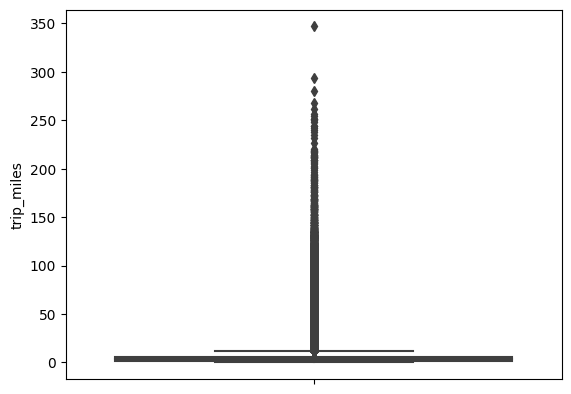

In [28]:
sns.boxplot(data = tlc_20_07, y="trip_miles");

Se observan numerosos outliers por este método. Quedará determinar si corresponde a errores o es debido a la dispersión de los datos. La superficie de NYC es de aproximadamente 468 millas cuadradas.

## trip_time

In [29]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_time.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [30]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.trip_time.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     9.888269e+02
std      6.634886e+02
min      0.000000e+00
25%      5.430000e+02
50%      8.270000e+02
75%      1.249000e+03
max      8.499800e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     1.025132e+03
std      6.926066e+02
min      0.000000e+00
25%      5.580000e+02
50%      8.540000e+02
75%      1.297000e+03
max      6.321000e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     1.056314e+03
std      7.113399e+02
min      0.000000e+00
25%      5.720000e+02
50%      8.800000e+02
75%      1.342000e+03
max      6.411800e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     1.039637e+03
std      6.936611e+02
min      0.000000e+00
25%      5.640000e+02
50%      8.680000e+02
75%      1.323000e+03
max      5.953900e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    

Tiempos de viaje de 0 segundos podrían ser errores. Veamos algunos casos.

In [31]:
tlc_20_07[tlc_20_07.trip_time == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
808459,HV0003,B02764,B02764,2020-07-03 18:21:04,2020-07-03 18:27:14,2020-07-03 18:28:48,2020-07-03 18:28:48,117,117,0.0,0,0.64,0.0,NaN,0.0,7.23,N,N,,N,N
886352,HV0003,B02875,B02875,2020-07-03 22:51:36,2020-07-03 22:56:44,2020-07-03 22:56:51,2020-07-03 22:56:51,225,225,0.0,0,0.19,0.0,NaN,0.0,223.24,N,N,,N,Y
1818983,HV0003,B02877,B02877,2020-07-07 10:29:18,2020-07-07 10:33:59,2020-07-07 10:36:26,2020-07-07 10:36:29,259,259,0.0,0,0.64,0.0,NaN,0.0,6.10,N,N,,N,N
3192184,HV0003,B02883,B02883,2020-07-11 18:35:34,2020-07-11 18:46:32,2020-07-11 18:48:09,2020-07-11 18:48:09,3,3,0.0,0,0.19,0.0,NaN,0.0,121.81,N,N,,N,N
5074341,HV0004,B02800,None,2020-07-17 17:50:04,NaT,2020-07-17 18:16:24,2020-07-17 18:16:25,239,151,0.0,0,0.92,0.0,NaN,0.0,0.00,N,N,N,N,Y


En estos casos, el pickup_time coincide con el dropoff_time, por lo que es factible que se trate de errores. Hagamos un análisis preliminar de outliers.

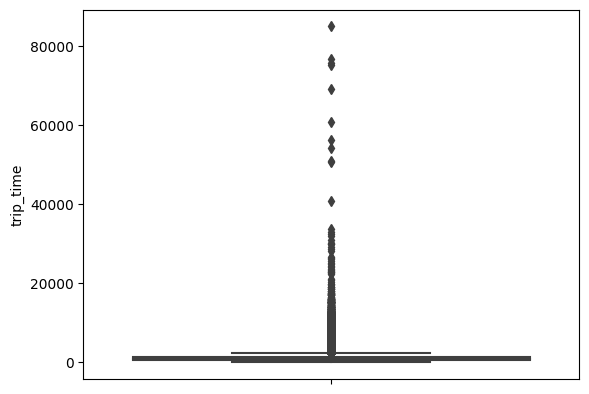

In [32]:
sns.boxplot(data = tlc_20_07, y="trip_time");

También se observan numerosos outliers que corresponderá estudiar.

## base_passenger_fare

In [33]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.base_passenger_fare.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [34]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.base_passenger_fare.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     1.941875e+01
std      1.565292e+01
min     -1.258200e+02
25%      9.530000e+00
50%      1.488000e+01
75%      2.384000e+01
max      1.482290e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     1.839999e+01
std      1.474524e+01
min     -1.266400e+02
25%      9.250000e+00
50%      1.429000e+01
75%      2.260000e+01
max      1.251930e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     1.806375e+01
std      1.401819e+01
min     -1.002800e+02
25%      9.370000e+00
50%      1.422000e+01
75%      2.232000e+01
max      1.314220e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     1.814592e+01
std      1.400032e+01
min     -1.144000e+02
25%      9.270000e+00
50%      1.450000e+01
75%      2.229000e+01
max      2.321910e+03
Name: base_passenger_fare, dtype: float64



Las tarifas negativas probablemente sean errores. Aquellas tarifas en el orden de 10^3, también es posible que sean errores, por alejarse del resto de los cuartilos. Hagamos un análisis preliminar de outliers.

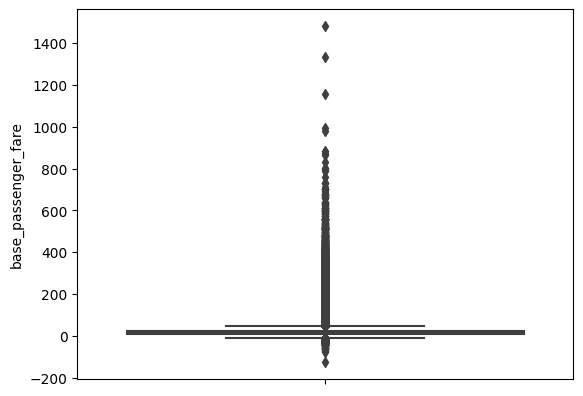

In [35]:
sns.boxplot(data = tlc_20_07, y="base_passenger_fare");

Se observan numerosos outliers por este método, por lo que corresponderá revisar si corresponden a errores en los datos o no.

## tolls

In [36]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.tolls.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [37]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.tolls.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     7.257689e-01
std      3.041978e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.106200e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     7.635806e-01
std      3.169058e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.858000e+01
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     7.790419e-01
std      3.186553e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.035700e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     7.761539e-01
std      3.234664e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.090500e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.159686e+07
mea

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

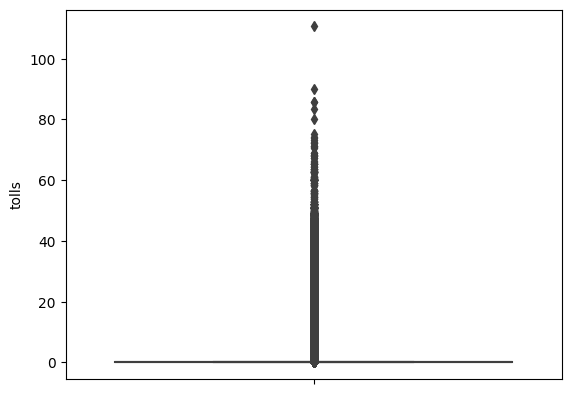

In [38]:
sns.boxplot(data = tlc_20_07, y="tolls");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## bcf

In [39]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.bcf.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [40]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.bcf.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     5.035908e-01
std      4.574669e-01
min      0.000000e+00
25%      2.400000e-01
50%      3.700000e-01
75%      6.100000e-01
max      3.730000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     4.765336e-01
std      4.313775e-01
min      0.000000e+00
25%      2.300000e-01
50%      3.600000e-01
75%      5.800000e-01
max      3.150000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     4.736212e-01
std      4.160938e-01
min      0.000000e+00
25%      2.300000e-01
50%      3.600000e-01
75%      5.800000e-01
max      3.361000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     4.789170e-01
std      4.180277e-01
min      0.000000e+00
25%      2.300000e-01
50%      3.700000e-01
75%      5.800000e-01
max      5.965000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.159686e+07
mean     5.

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

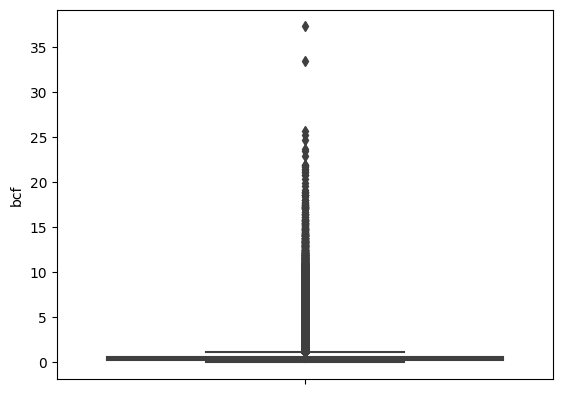

In [41]:
sns.boxplot(data = tlc_20_07, y="bcf");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## sales_tax

In [42]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.sales_tax.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [43]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.sales_tax.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     1.667383e+00
std      1.337889e+00
min      0.000000e+00
25%      8.200000e-01
50%      1.280000e+00
75%      2.070000e+00
max      9.100000e+01
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     1.572410e+00
std      1.243754e+00
min      0.000000e+00
25%      7.800000e-01
50%      1.220000e+00
75%      1.960000e+00
max      8.876000e+01
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     1.546890e+00
std      1.186834e+00
min      0.000000e+00
25%      8.000000e-01
50%      1.220000e+00
75%      1.950000e+00
max      1.130600e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     1.554235e+00
std      1.186277e+00
min      0.000000e+00
25%      7.900000e-01
50%      1.240000e+00
75%      1.950000e+00
max      1.059900e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

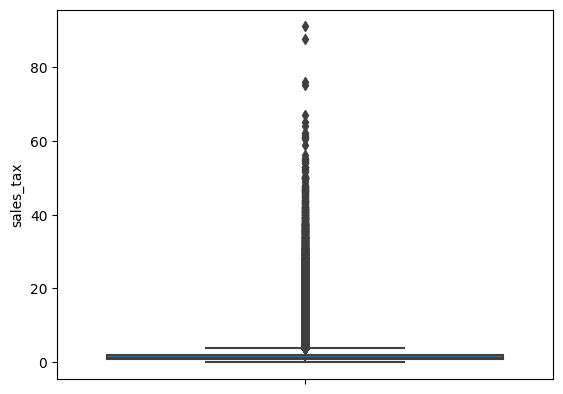

In [44]:
sns.boxplot(data = tlc_20_07, y="sales_tax");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## congestion_surcharge

In [45]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.congestion_surcharge.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [46]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.congestion_surcharge.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     7.633782e-01
std      1.231589e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     8.334095e-01
std      1.270988e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     9.020938e-01
std      1.300475e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     9.935227e-01
std      1.339704e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      1.375000e+01
Name: congestion_surcharge, dtype: float

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

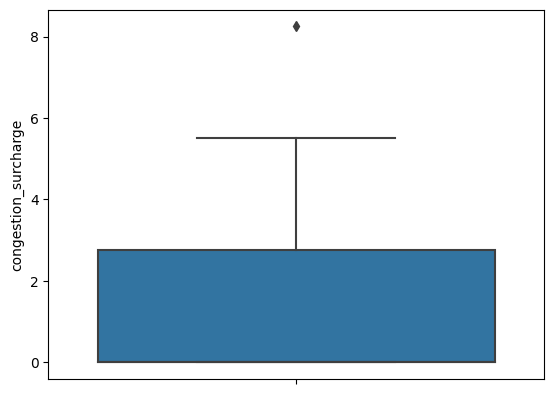

In [47]:
sns.boxplot(data = tlc_20_07, y="congestion_surcharge");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## airport_fee

In [48]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.airport_fee.isna().mean()}")

Promedio de nulos por mes: 0.9999993974968404
Promedio de nulos por mes: 0.999978372244669
Promedio de nulos por mes: 0.9999611784215791
Promedio de nulos por mes: 1.0
Promedio de nulos por mes: 0.999999741309397
Promedio de nulos por mes: 0.9999999140681077


Casi el 100% de los valores en esta columna son nulos.

In [49]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.airport_fee.describe()}\n")

La descripción de cada mes es: count    6.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    240.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    470.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count     0.0
mean     <NA>
std      <NA>
min      <NA>
25%      <NA>
50%      <NA>
75%      <NA>
max      <NA>
Name: airport_fee, dtype: Float64

La descripción de cada mes es: count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    1.0
mean     0.0
std      NaN
min      0.0
25%      0.0
50%      0.0
7

Todos los valores son 0 o nulos.

## tips

In [50]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.tips.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [51]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.tips.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     5.280907e-01
std      1.953837e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.750000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     4.493398e-01
std      1.809337e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.275000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     4.968168e-01
std      1.847117e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     5.184221e-01
std      1.862785e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.750000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.159686e+07
mean   

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

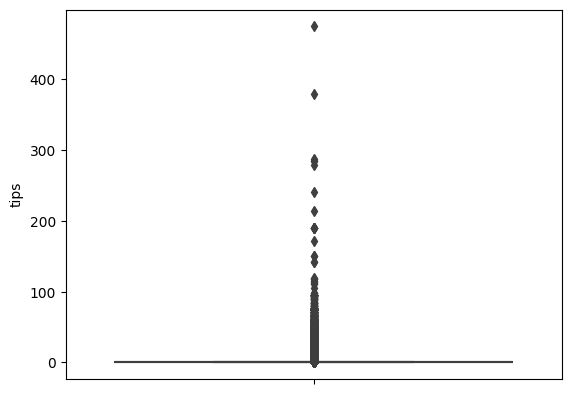

In [52]:
sns.boxplot(data = tlc_20_07, y="tips");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## driver_pay

In [53]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.driver_pay.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [54]:
for df in tlc_20_S2:
    print(f"La descripción de cada mes es: "
          f"{df.driver_pay.describe()}\n")

La descripción de cada mes es: count    9.958454e+06
mean     1.591764e+01
std      1.209125e+01
min     -2.730800e+02
25%      8.490000e+00
50%      1.279000e+01
75%      1.952000e+01
max      8.892200e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.109685e+07
mean     1.506341e+01
std      1.200396e+01
min     -1.187000e+01
25%      7.480000e+00
50%      1.171000e+01
75%      1.860000e+01
max      1.022980e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.210667e+07
mean     1.492485e+01
std      1.192210e+01
min     -3.348000e+01
25%      7.150000e+00
50%      1.153000e+01
75%      1.868000e+01
max      9.856700e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.326841e+07
mean     1.459522e+01
std      1.159802e+01
min     -1.063000e+01
25%      7.010000e+00
50%      1.125000e+01
75%      1.822000e+01
max      1.741440e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count

Los valores negativos es probable que sean errores. Haremos un análisis preliminar de outliers.

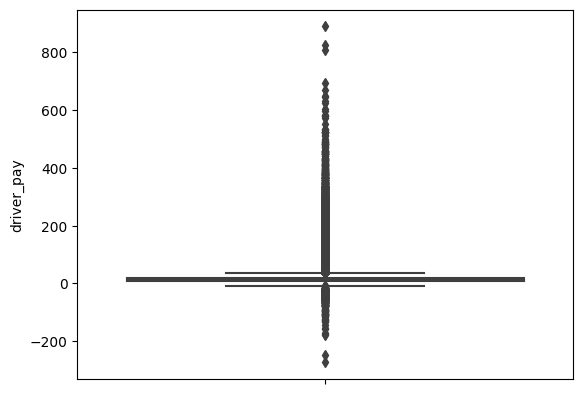

In [55]:
sns.boxplot(data = tlc_20_07, y="driver_pay");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## shared_request_flag

In [56]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [57]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.shared_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


Las proporciones de usuarios que solicitaron compartir viajes fueron:

In [58]:
for df in tlc_20_S2:
    print(df.shared_request_flag.value_counts(normalize=True), "\n")

shared_request_flag
N    0.999819
Y    0.000181
Name: proportion, dtype: float64 

shared_request_flag
N    0.999785
Y    0.000215
Name: proportion, dtype: float64 

shared_request_flag
N    0.999584
Y    0.000416
Name: proportion, dtype: float64 

shared_request_flag
N    0.999459
Y    0.000541
Name: proportion, dtype: float64 

shared_request_flag
N    0.999504
Y    0.000496
Name: proportion, dtype: float64 

shared_request_flag
N    0.999542
Y    0.000458
Name: proportion, dtype: float64 



## shared_match_flag

In [59]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [60]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.shared_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [61]:
for df in tlc_20_S2:
    print(df.shared_match_flag.value_counts(normalize=True), "\n")

shared_match_flag
N    0.99999
Y    0.00001
Name: proportion, dtype: float64 

shared_match_flag
N    0.999969
Y    0.000031
Name: proportion, dtype: float64 

shared_match_flag
N    0.99992
Y    0.00008
Name: proportion, dtype: float64 

shared_match_flag
N    0.999888
Y    0.000112
Name: proportion, dtype: float64 

shared_match_flag
N    0.999905
Y    0.000095
Name: proportion, dtype: float64 

shared_match_flag
N    0.999912
Y    0.000088
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros compartieron viajes.

## access_a_ride_flag

In [62]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.access_a_ride_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [63]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.access_a_ride_flag.unique()}")

Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']


Según el diccionario de datos, esta columna puede tomar los valores 'Y' o 'N'. La presencia de un string vacio puede hablar de problemas en la calidad de los datos.

## wav_request_flag

In [64]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [65]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.wav_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [66]:
for df in tlc_20_S2:
    print(df.wav_request_flag.value_counts(normalize=True), "\n")

wav_request_flag
N    0.998404
Y    0.001596
Name: proportion, dtype: float64 

wav_request_flag
N    0.998406
Y    0.001594
Name: proportion, dtype: float64 

wav_request_flag
N    0.998325
Y    0.001675
Name: proportion, dtype: float64 

wav_request_flag
N    0.998273
Y    0.001727
Name: proportion, dtype: float64 

wav_request_flag
N    0.998404
Y    0.001596
Name: proportion, dtype: float64 

wav_request_flag
N    0.998477
Y    0.001523
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros solicitaron vehículos accesibles para sillas de ruedas.

## wav_match_flag

In [67]:
for df in tlc_20_S2:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [68]:
for df in tlc_20_S2:
    print(f"Los valores únicos por mes: "
          f"{df.wav_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [69]:
for df in tlc_20_S2:
    print(df.wav_match_flag.value_counts(normalize=True), "\n")

wav_match_flag
N    0.954389
Y    0.045611
Name: proportion, dtype: float64 

wav_match_flag
N    0.959223
Y    0.040777
Name: proportion, dtype: float64 

wav_match_flag
N    0.958501
Y    0.041499
Name: proportion, dtype: float64 

wav_match_flag
N    0.958771
Y    0.041229
Name: proportion, dtype: float64 

wav_match_flag
N    0.957511
Y    0.042489
Name: proportion, dtype: float64 

wav_match_flag
N    0.955001
Y    0.044999
Name: proportion, dtype: float64 



En todos los meses, aproximadamente el 4% de los viajes sucedieron en vehículos accesibles para sillas de ruedas.